# Supervised Logistic Regression for Classification
<hr>

## 0. Import library

In [26]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>

The data features $x_i=(x_{i(1)},x_{i(2)})$ represent 2 exam grades $x_{i(1)}$ and $x_{i(2)}$ for each student $i$.

The data label $y_i$ indicates if the student $i$ was admitted (value is 1) or rejected (value is 0).

In [27]:
# import data with numpy
data = np.loadtxt('dataset.txt', delimiter=',')

# number of training data
n = data.shape[0]
print('Number of training data=',n)

Number of training data= 100


## 2. Explore the dataset distribution
<hr>

Plot the training data points.<br>

You may use matplotlib function `scatter(x,y)`.

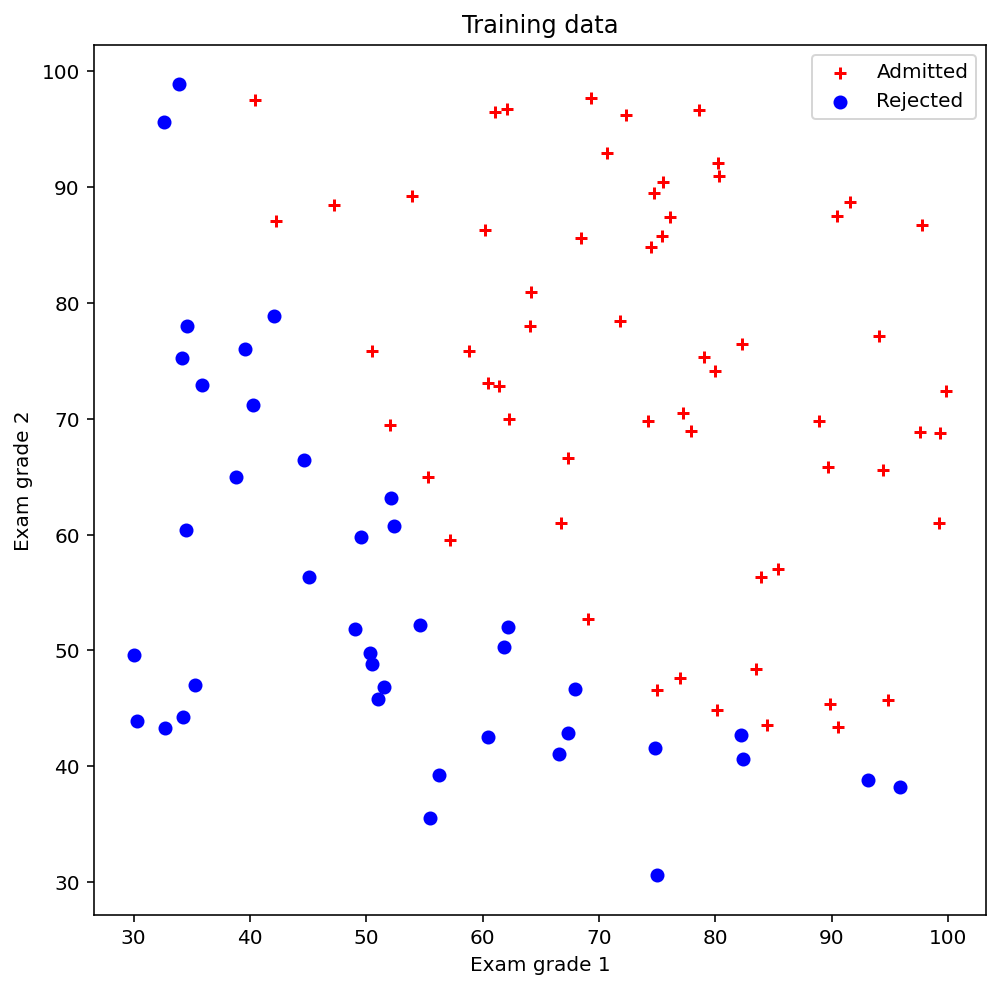

In [28]:
x1 = data[:,0] # exam grade 1
x2 = data[:,1] # exam grade 2
idx_admit = (data[:,2]==1) # index of students who were admitted
idx_rejec = (data[:,2]==0) # index of students who were rejected

plt.figure(figsize=(8,8))
plt.scatter(x=x1[idx_admit],y=x2[idx_admit],c="red",marker="+") 
plt.scatter(x1[idx_rejec],x2[idx_rejec],c="blue",marker="o" ) 
plt.title('Training data')
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(["Admitted","Rejected"])
plt.show()

In [29]:
x2

array([78.02469282, 43.89499752, 72.90219803, 86.3085521 , 75.34437644,
       56.31637178, 96.51142588, 46.55401354, 87.42056972, 43.53339331,
       38.22527806, 30.60326323, 76.4819633 , 97.71869196, 76.03681085,
       89.20735014, 52.74046973, 46.67857411, 92.92713789, 47.57596365,
       42.83843832, 65.79936593, 48.85581153, 44.2095286 , 68.97235999,
       69.95445795, 44.82162893, 38.80067034, 50.25610789, 64.99568096,
       72.80788731, 57.05198398, 63.12762377, 69.43286012, 71.16774802,
       52.21388588, 98.86943574, 80.90806059, 41.57341523, 75.23772034,
       56.30804622, 46.85629026, 65.56892161, 40.61825516, 45.82270146,
       52.06099195, 70.4582    , 86.72782233, 96.76882412, 88.69629255,
       74.16311935, 60.999031  , 43.39060181, 60.39634246, 49.80453881,
       59.80895099, 68.86157272, 95.59854761, 69.82457123, 78.45356225,
       85.75993667, 47.02051395, 39.26147251, 49.59297387, 66.45008615,
       41.09209808, 97.53518549, 51.88321182, 92.11606081, 60.99

## 3. Sigmoid/logistic function
<hr>

$$
\sigma(\eta) = \frac{1}{1 + \exp^{-\eta}}
$$

Define and plot the sigmoid function for values in [-10,10]:

You may use functions `np.exp`, `np.linspace`.

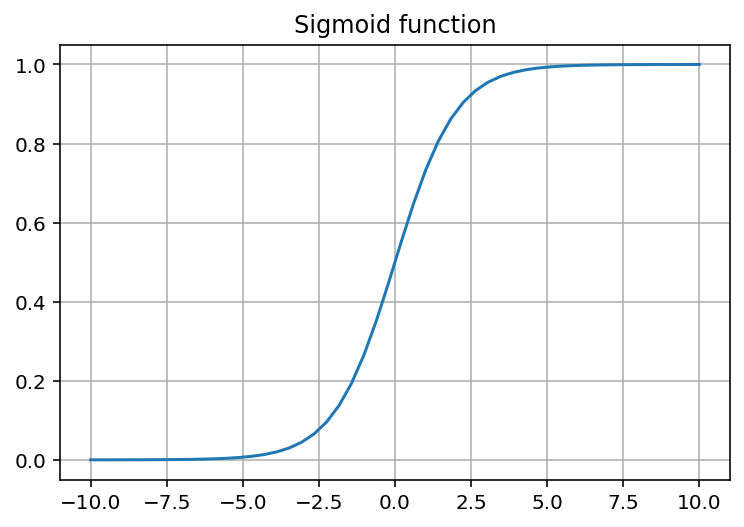

In [30]:
def sigmoid(z):
    
    sigmoid_f =1/(1+np.exp(-z)) 
    
    return sigmoid_f 


# plot
x_values = np.linspace(-10,10)

plt.figure(2)
plt.plot(x_values,sigmoid(x_values))
plt.title("Sigmoid function")
plt.grid(True)

## 4. Define the prediction function for the classification
<hr>

#### The prediction function is defined by:

$$
\begin{aligned}
p_w(x) = \sigma(w_0 + w_1 x_{(1)} + w_2 x_{(2)}) = \sigma(w^T x)
\end{aligned}
$$

#### Implement the prediction function in a vectorised way as follows:

$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_{1(1)} & x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} \\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} 
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2
\end{array} 
\right]
\quad
\Rightarrow 
\quad
p_w(x) = \sigma(X w)  =
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
$$

Use the new function `sigmoid`.

In [31]:

n = x1.size
X = np.stack([np.ones(n),x1,x2],axis=1)

# parameters vector
w = np.array([[0.3],[0],[0]])
w =np.array([-10,0.1,-0.2])[:,None]
# predictive function definition
def f_pred(X,w): 
    
    p = sigmoid(np.dot(X,w).reshape(-1,1))

    return p
def f_pred2(X,w): 
    
    f = np.matmul(X,w)
    
    return f 
y_pred = f_pred(X,w)
y_pred
y_pred2=f_pred2(X,w)
y_pred2

array([[-22.1425726 ],
       [-15.75032843],
       [-20.99569873],
       [-21.24345048],
       [-17.16560168],
       [-16.75494661],
       [-23.19161872],
       [-11.80832815],
       [-19.87423527],
       [-10.26339667],
       [ -8.0589001 ],
       [ -8.61928681],
       [-17.06568732],
       [-22.60727952],
       [-21.25352826],
       [-22.44436481],
       [-13.64107954],
       [-12.54102927],
       [-21.51927662],
       [-11.81731436],
       [-11.83048491],
       [-14.19219561],
       [-14.71768348],
       [-15.42069962],
       [-16.00206285],
       [-17.76379022],
       [-10.94530771],
       [ -8.44869519],
       [-13.86820098],
       [-19.12055581],
       [-18.42364852],
       [-12.86994486],
       [-17.41472678],
       [-18.68203155],
       [-20.20986023],
       [-14.97926662],
       [-26.38233714],
       [-19.76391323],
       [-10.83575775],
       [-21.62918006],
       [-12.87136988],
       [-14.21648603],
       [-13.66944754],
       [ -9

In [32]:
X = np.stack([np.ones(n),x1,x2],axis=1)
X.shape 
x1.size
y_pred.shape

(100, 1)

## 5. Define the classification loss function 
<hr>

#### Mean Square Error

$$
L(w) = \frac{1}{n} \sum_{i=1}^n \left( \sigma( w^T x_i ) - y_i \right)^2
$$

#### Cross-Entropy

$$
L(w) = \frac{1}{n} \sum_{i=1}^n \left( - y_i \log( \sigma( w^T x_i ) ) - (1 - y_i) \log( 1 - \sigma( w^T x_i ) ) \right)
$$

#### The vectorized representation is for the mean square error is as follows:

$$
L(w) = \frac{1}{n} \Big( p_w(x) - y \Big)^T \Big( p_w(x) - y \Big)
$$

#### The vectorized representation is for the cross-entropy error is as follows:

$$
L(w) = \frac{1}{n} \Big( - y^T \log(p_w(x)) - (1-y)^T \log(1-p_w(x)) \Big)
$$

where

$$
p_w(x)= \sigma(Xw)=
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

You may use numpy functions `.T` and `np.log`.

In [33]:
def mse_loss(label, h_arr):  # mean square error 
    temp=h_arr-label
    L=temp*temp
    return np.mean(L)

def ce_loss(label, h_arr):  # cross-entropy error
#     L=np.dot(-y.T,np.log(h_arr))-np.dot((1-y).T,np.log(1-h_arr))
    L=-label*np.log(h_arr)-(1-label)*np.log(1-h_arr)
    return np.mean(L) 

In [43]:
y = data[:,2][:,None]
# temp=y-y_pred
# temp*temp
# print(np.sum(temp*temp))
print(ce_loss(y,y_pred))
sadtry = -y*np.log(y_pred)-(1-y)*np.log(1-y_pred)
sadtry

10.391644147841939


array([[2.41881626e-10],
       [1.44450565e-07],
       [7.61524510e-10],
       [2.12434505e+01],
       [1.71656017e+01],
       [5.28955493e-08],
       [2.31916187e+01],
       [1.18083356e+01],
       [1.98742353e+01],
       [1.02634316e+01],
       [3.16224479e-04],
       [1.80572699e-04],
       [1.70656874e+01],
       [2.26072795e+01],
       [5.88450511e-10],
       [2.24443648e+01],
       [1.36410807e+01],
       [3.57683917e-06],
       [2.15192766e+01],
       [1.18173217e+01],
       [7.27920759e-06],
       [1.41921963e+01],
       [4.05687094e-07],
       [2.00851557e-07],
       [1.60020630e+01],
       [1.77637902e+01],
       [1.09453254e+01],
       [2.14156764e-04],
       [9.48673209e-07],
       [4.96647347e-09],
       [1.84236485e+01],
       [1.28699474e+01],
       [2.73451462e-08],
       [1.86820316e+01],
       [1.67097214e-09],
       [3.12310867e-07],
       [3.48576723e-12],
       [1.97639132e+01],
       [1.96827569e-05],
       [4.04172251e-10],


## 6. Define the gradient of the classification loss function 
<hr>

#### Given the mean square loss

$$
L(w) = \frac{1}{n} \Big( p_w(x) - y \Big)^T \Big( p_w(x) - y \Big)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T \Big( (p_w(x)-y) \odot (p_w(x) \odot (1-p_w(x)) \Big) 
$$

#### Given the cross-entropy loss

$$
L(w) = \frac{1}{n} \Big( - y^T \log(p_w(x)) - (1-y)^T \log(1-p_w(x)) \Big)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(p_w(x)-y)
$$

#### Implement the vectorized version of the gradient of the classification loss function

In [35]:
# gradient function definition(Cross Engropy)
def loss_logreg(y_pred,y): 
    
    n = len(y)
    loss = np.dot(X.T,(y_pred-y))/n*2
    
    return loss


# Test loss function 
y = data[:,2][:,None] # label 
y_pred = f_pred(X,w) # prediction

loss = loss_logreg(y_pred,y)
loss

array([[ -1.19997748],
       [-89.66073498],
       [-88.74679614]])

In [36]:
# gradient function (MeanSquareError)
def gradient_mse(y_pred,y):

    grad = np.matmul(X.T,y_pred-y)/y.size*2
    
    return grad

In [37]:
X.shape
w

array([[-10. ],
       [  0.1],
       [ -0.2]])

## 7. Implement the gradient descent algorithm 
<hr>

#### Vectorized implementation for the mean square loss: 
$$
w^{k+1} = w^{k} - \tau \frac{2}{n} X^T \Big( (p_w(x)-y) \odot (p_w(x) \odot (1-p_w(x)) \Big) 
$$

#### Vectorized implementation for the cross-entropy loss: 
$$
w^{k+1} = w^{k} - \tau \frac{2}{n} X^T(p_w(x)-y)
$$

#### Plot the loss values $L(w^k)$ w.r.t. iteration $k$ the number of iterations for the both loss functions.

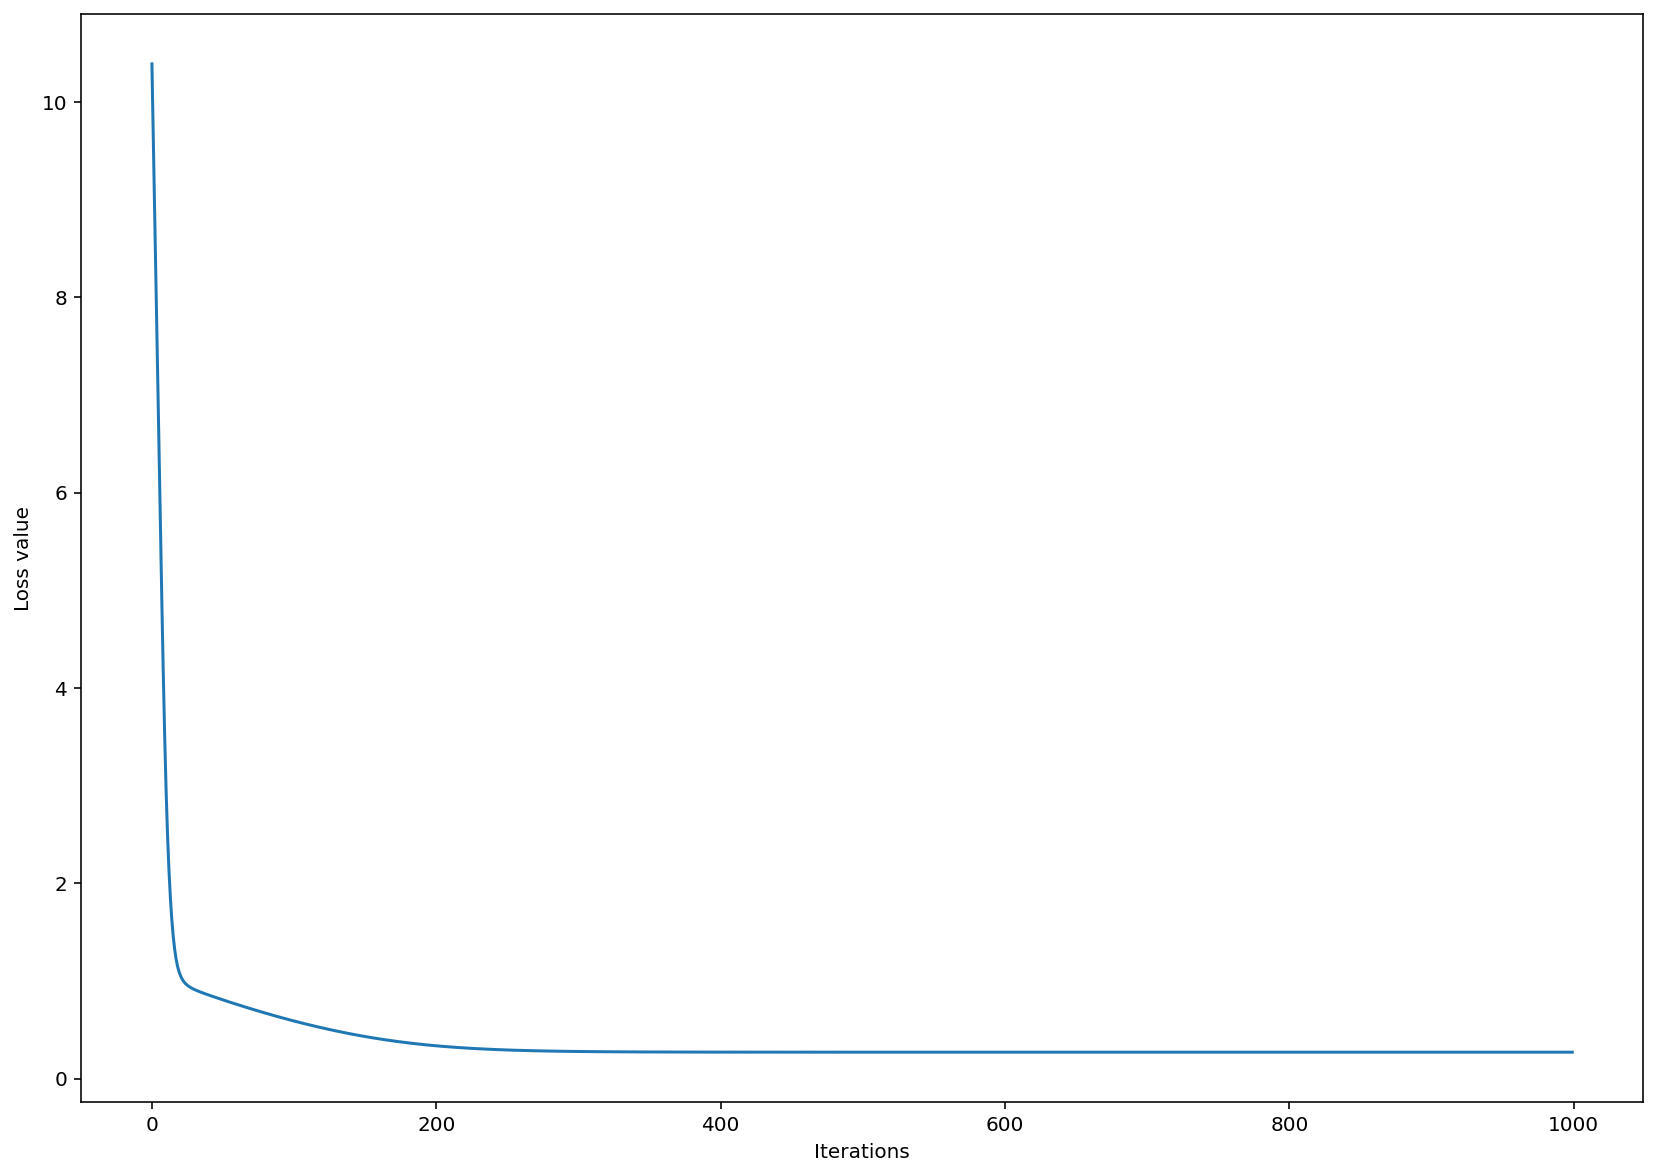

In [52]:

# cross_entropy gradient descent function definition
def cross_grad_desc(X, y , w_init=np.array([0,0,0])[:,None] ,tau=1e-4, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,2]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X,w) # linear predicition function  
        #grad_f = grad_loss(y_pred,y,X) # gradient of the loss 
        grad_f = loss_logreg(y_pred,y) # gradient of the loss 
        w = w - tau* grad_f # update rule of gradient descent 
        
#         print(i)
#         print(y_pred)
        L_iters[i] = ce_loss(y,y_pred) # save the current loss value 
#         print(L_iters[i])
        w_iters[i,:] = w[0],w[1] # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm
start = time.time()
w_init = np.array([-10,0.1,-0.2])[:,None]
tau = 1e-4; max_iter = 1000
w, L_iters, w_iters = cross_grad_desc(X,y,w_init,tau,max_iter)


# plot
plt.figure(figsize=(14,10))
plt.plot(L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


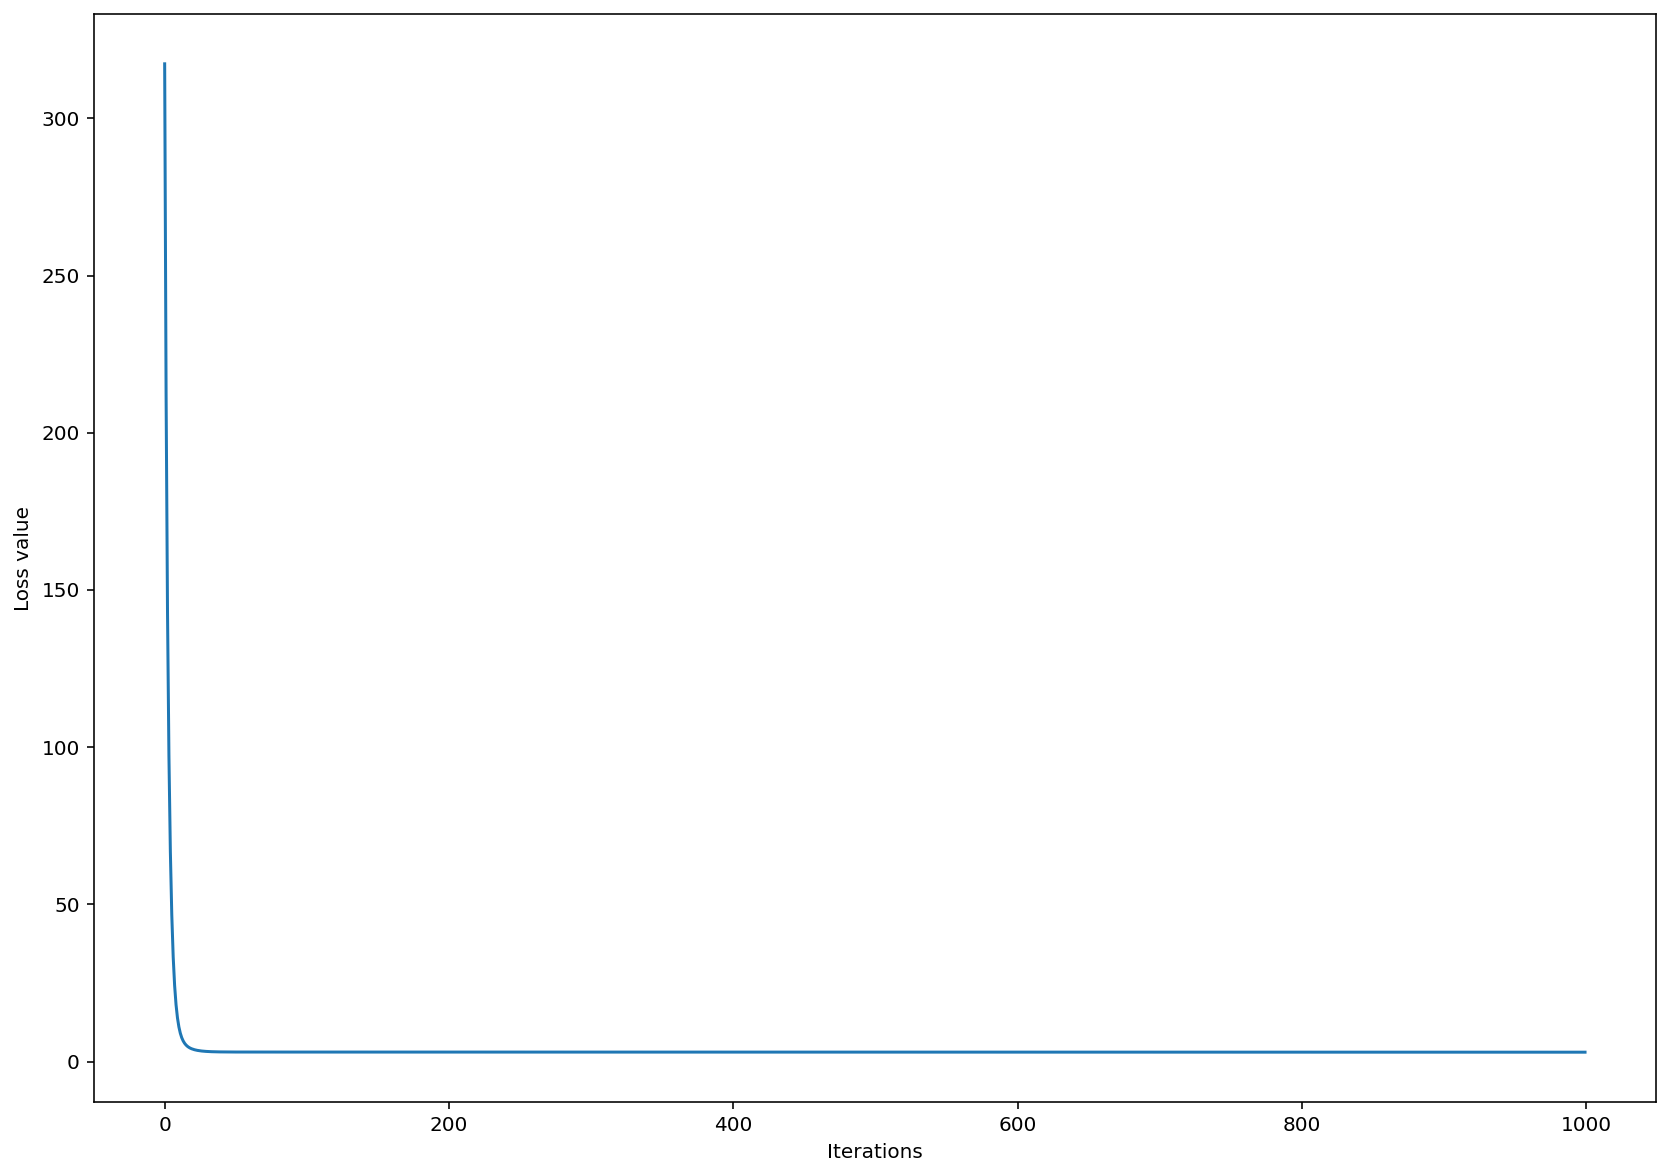

In [39]:
# mse gradient descent function definition
def mse_grad_desc(X, y , w_init=np.array([0,0,0])[:,None] ,tau=1e-4, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,2]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred2(X,w) # linear predicition function  
        #grad_f = grad_loss(y_pred,y,X) # gradient of the loss 
        grad_f = gradient_mse(y_pred,y) # gradient of the loss 
        w = w - tau* grad_f # update rule of gradient descent 
        
#         print(i)
#         print(y_pred)
        L_iters[i] = mse_loss(y,y_pred) # save the current loss value 
#         print(L_iters[i])
        w_iters[i,:] = w[0],w[1] # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm
start = time.time()
w_init = np.array([-10,0.1,-0.2])[:,None]
tau = 1e-4; max_iter = 1000
w, L_iters, w_iters = mse_grad_desc(X,y,w_init,tau,max_iter)


# plot
plt.figure(figsize=(14,10))
plt.plot(L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


## 8. Plot the decision boundary
<hr>

The decision boundary is defined by all points 

$$
x=(x_{(1)},x_{(2)}) \quad \textrm{ such that } \quad p_w(x) = 0.5
$$

You may use numpy and matplotlib functions `np.meshgrid`, `np.linspace`, `reshape`, `contour`.

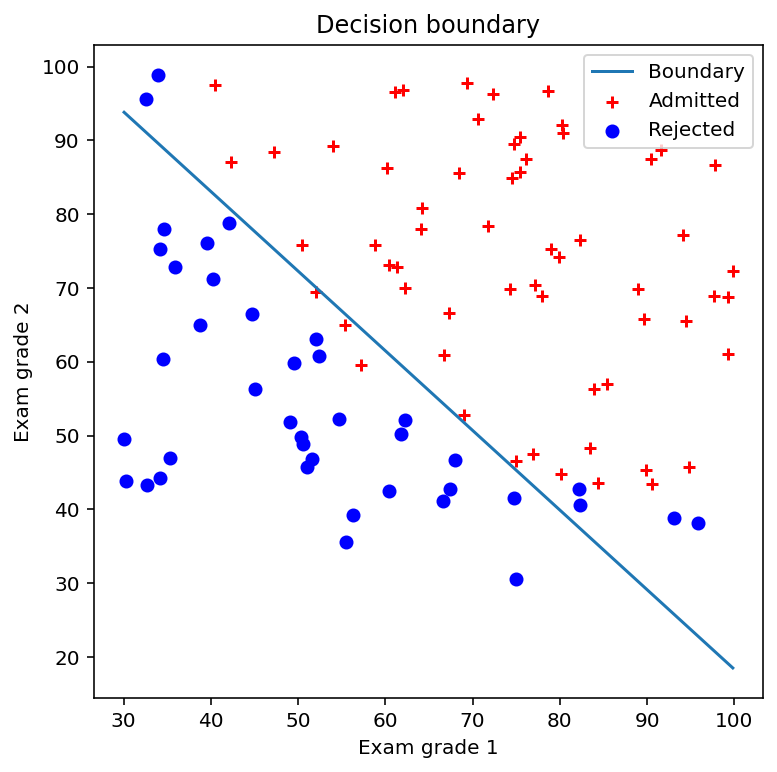

In [197]:
## Cross Entropy

# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
# xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
# X2 = np.ones([np.prod(xx1.shape),3]) 
# X2[:,1] = xx1.reshape(-1)
# X2[:,2] = xx2.reshape(-1)
# p = f_pred(X2,w)
# p = p.reshape(50,50)
x_line=np.linspace(x1_min, x1_max)
y_line=-(w[0]+w[1]*x_line)/w[2]

# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x=x1[idx_admit],y=x2[idx_admit],c="red",marker="+") 
plt.scatter(x1[idx_rejec],x2[idx_rejec],c="blue",marker="o" ) 
plt.plot(x_line,y_line)
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(["Boundary","Admitted","Rejected"])
plt.title('Decision boundary')
plt.show()

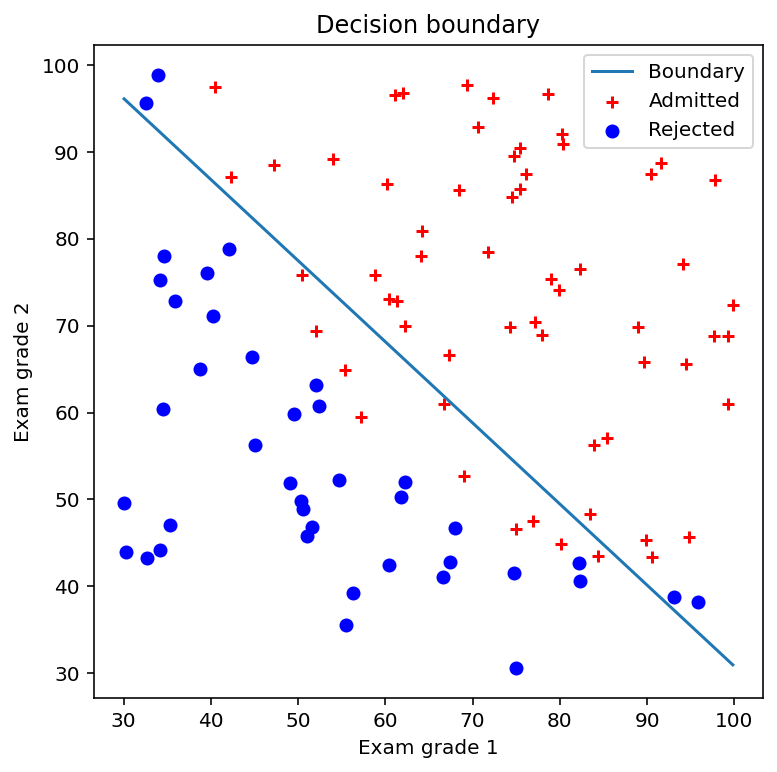

In [257]:
## MSE 

# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
x_line=np.linspace(x1_min, x1_max)
y_line=-(w[0]+w[1]*x_line)/w[2]

# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x=x1[idx_admit],y=x2[idx_admit],c="red",marker="+") 
plt.scatter(x1[idx_rejec],x2[idx_rejec],c="blue",marker="o" ) 
plt.plot(x_line,y_line)
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(["Boundary","Admitted","Rejected"])
plt.title('Decision boundary')
plt.show()

In [192]:
x_line=np.linspace(x1_min, x1_max)
y_line=-(w[0]+w[1]*x_line)/w[2]

## 9. Comparison with Scikit-learn logistic regression algorithm with the gradient descent with the cross-entropy loss
<hr>

You may use scikit-learn function `LogisticRegression(C=1e6)`.

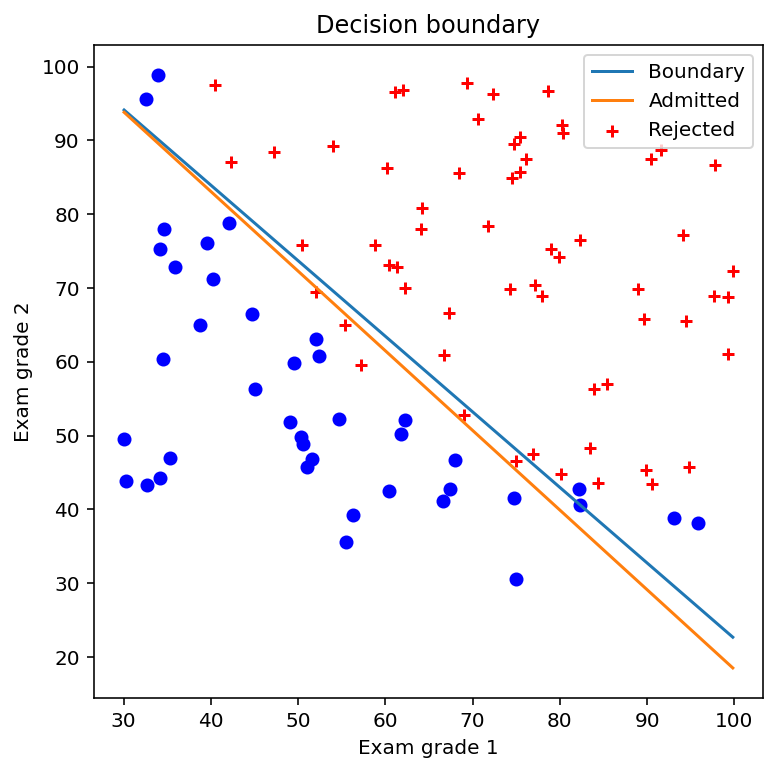

In [58]:
# run logistic regression with scikit-learn
start = time.time()
logreg_sklearn = LogisticRegression(C=1e6)# scikit-learn logistic regression
logreg_sklearn.fit(data[:,[0,1]],data[:,2]) # learn the model parameters 

# compute loss value
b=logreg_sklearn.intercept_
w_sklearn = logreg_sklearn.coef_

# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x=x1[idx_admit],y=x2[idx_admit],c="red",marker="+") 
plt.scatter(x1[idx_rejec],x2[idx_rejec],c="blue",marker="o" )

plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')

x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
x_line=np.linspace(x1_min, x1_max)
y_line=-(b[0]+w_sklearn[0][0]*x_line)/w_sklearn[0][1]


plt.plot(x_line,y_line)
y_line2=-(w[0]+w[1]*x_line)/w[2]
plt.plot(x_line,y_line2)

plt.title('Decision boundary (black with gradient descent and magenta with scikit-learn)')
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(["Boundary","Admitted","Rejected"])
plt.title('Decision boundary')
plt.show()


In [48]:
start = time.time()
logreg_sklearn = LogisticRegression(C=1e6)# scikit-learn logistic regression
logreg_sklearn.fit(data[:,[0,1]],data[:,2]) # learn the model parameters 
# logreg_sklearn.fit(X,data[:,2])
logreg_sklearn.coef_
logreg_sklearn.predict(data[:,[0,1]])
w_sklearn = logreg_sklearn.coef_
logreg_sklearn.intercept_

array([-25.16138556])

In [53]:
w


array([[-10.00125246],
       [  0.08547625],
       [  0.07922129]])

## 10. Plot the probability map
<hr>

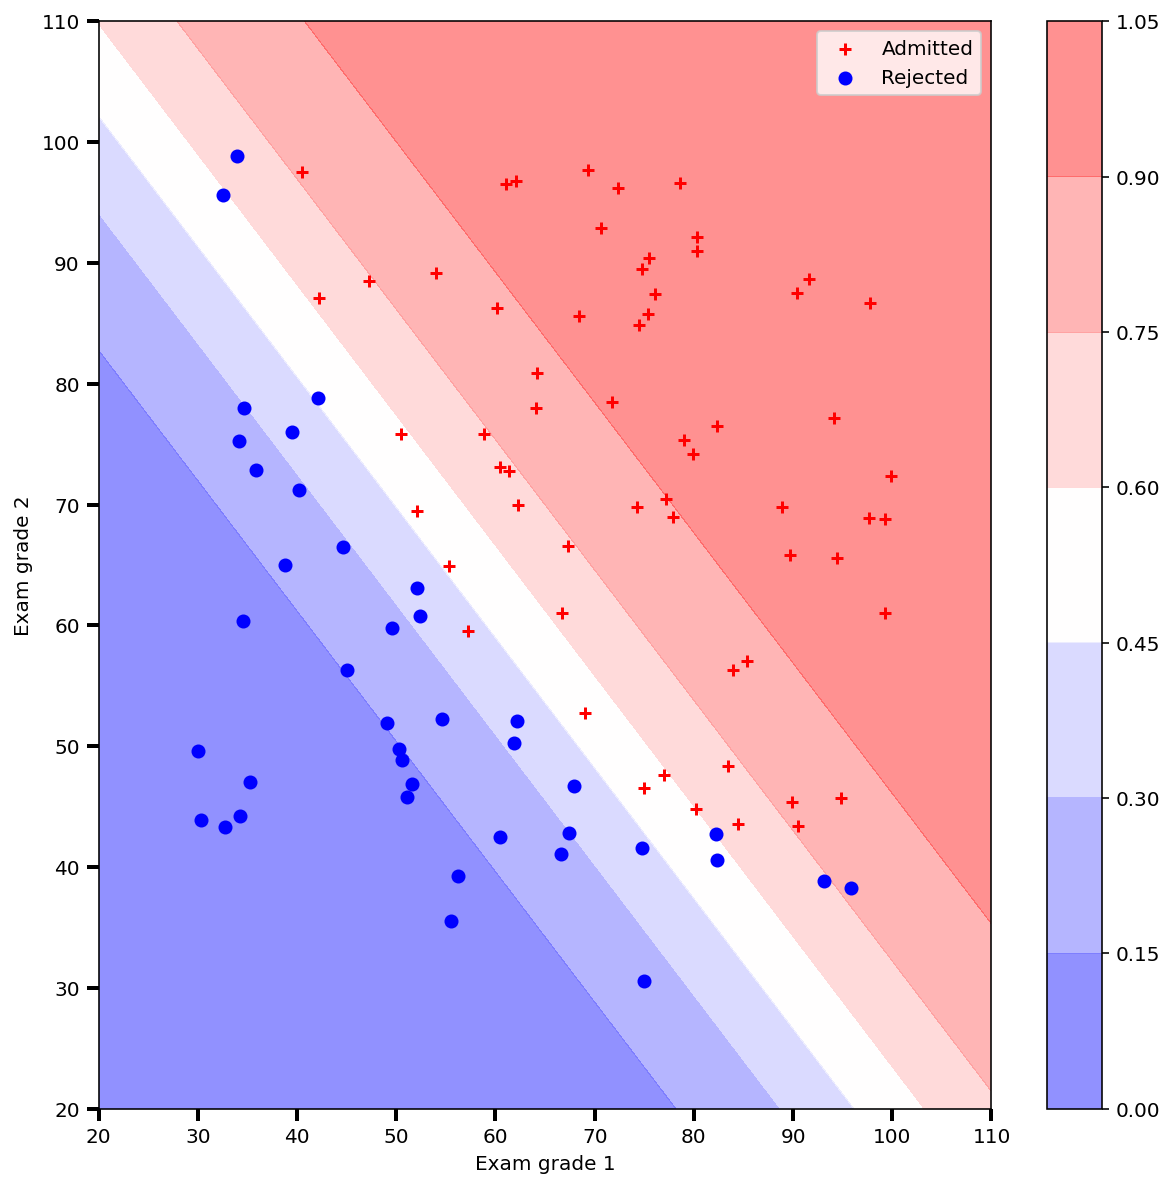

In [248]:
#cross entropy
num_a = 110
grid_x1 = np.linspace(20,110,num_a)
grid_x2 = np.linspace(20,110,num_a)

score_x1, score_x2 = np.meshgrid(grid_x1,grid_x2)

X_temp = np.ones([np.prod(score_x1.shape),3])
X_temp[:,1]=score_x1.reshape(-1)
X_temp[:,2]=score_x2.reshape(-1)
Z = f_pred(X_temp,w).reshape(110,110)
# xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
# X2 = np.ones([np.prod(xx1.shape),3]) 
# X2[:,1] = xx1.reshape(-1)
# X2[:,2] = xx2.reshape(-1)
# p = f_pred(X2,w)
# p = p.reshape(50,50)
# for i in range(len(score_x1)):
#     for j in range(len(score_x2)):
        
#             predict_prob = sigmoid( )

#             Z[j, i] = predict_prob
            
            # actual plotting example
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.tick_params(length=6, width=2, grid_alpha=0.5)
ax.set_xlabel('Exam grade 1')
ax.set_ylabel('Exam grade 2')

ax.set_xlim(20, 110)
ax.set_ylim(20, 110)

cf = ax.contourf(score_x1,score_x2,Z,cmap="bwr",alpha=0.5)
ax.scatter(x=x1[idx_admit],y=x2[idx_admit],c="red",marker="+",label="Admitted") 
ax.scatter(x1[idx_rejec],x2[idx_rejec],c="blue",marker="o",label="Rejected" ) 
cbar = fig.colorbar(cf)
cbar.update_ticks()
plt.legend()
plt.show()

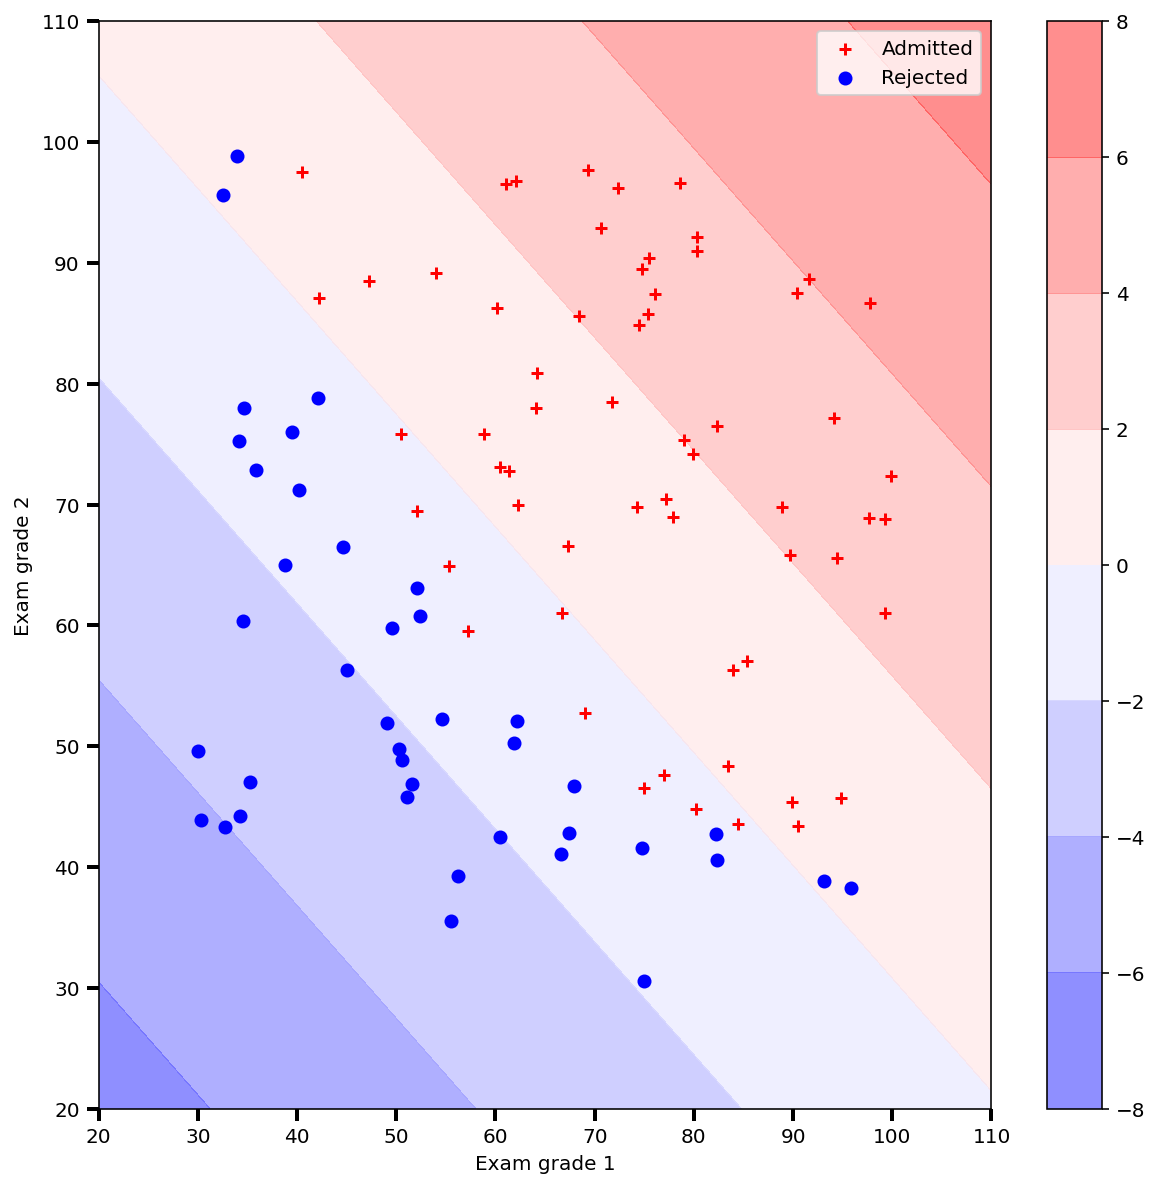

In [40]:
##MSE
num_a = 110
grid_x1 = np.linspace(20,110,num_a)
grid_x2 = np.linspace(20,110,num_a)

score_x1, score_x2 = np.meshgrid(grid_x1,grid_x2)

X_temp = np.ones([np.prod(score_x1.shape),3])
X_temp[:,1]=score_x1.reshape(-1)
X_temp[:,2]=score_x2.reshape(-1)
Z = f_pred2(X_temp,w).reshape(110,110)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.tick_params(length=6, width=2, grid_alpha=0.5)
ax.set_xlabel('Exam grade 1')
ax.set_ylabel('Exam grade 2')

ax.set_xlim(20, 110)
ax.set_ylim(20, 110)

cf = ax.contourf(score_x1,score_x2,Z,cmap="bwr",alpha=0.5)
ax.scatter(x=x1[idx_admit],y=x2[idx_admit],c="red",marker="+",label="Admitted") 
ax.scatter(x1[idx_rejec],x2[idx_rejec],c="blue",marker="o",label="Rejected" ) 
cbar = fig.colorbar(cf)
cbar.update_ticks()
plt.legend()
plt.show()

In [210]:
num_a = 110
grid_x1 = np.linspace(20,110,num_a)
grid_x2 = np.linspace(20,110,num_a)

score_x1, score_x2 = np.meshgrid(grid_x1,grid_x2)

Z = np.zeros(score_x1.shape)
Z.shape
X_temp = np.ones([np.prod(score_x1.shape),3])
X_temp[:,1]=score_x1.reshape(-1)
X_temp[:,2]=score_x2.reshape(-1)
Z = f_pred(X_temp,w).reshape(110,110)
Z.shape
Z

array([[0.00122047, 0.0013096 , 0.00140523, ..., 0.69939273, 0.71401906,
        0.72821029],
       [0.00130286, 0.001398  , 0.00150008, ..., 0.7129633 , 0.7271869 ,
        0.74096176],
       [0.00139081, 0.00149236, 0.00160132, ..., 0.7261611 , 0.73996924,
        0.75331763],
       ...,
       [0.57243439, 0.58961332, 0.60657641, ..., 0.99960786, 0.99963457,
        0.99965947],
       [0.58836306, 0.60534323, 0.62207289, ..., 0.99963268, 0.9996577 ,
        0.99968102],
       [0.60410872, 0.62085792, 0.63732393, ..., 0.99965593, 0.99967937,
        0.99970121]])

# Output results

## 1. Plot the dataset in 2D cartesian coordinate system (1pt)

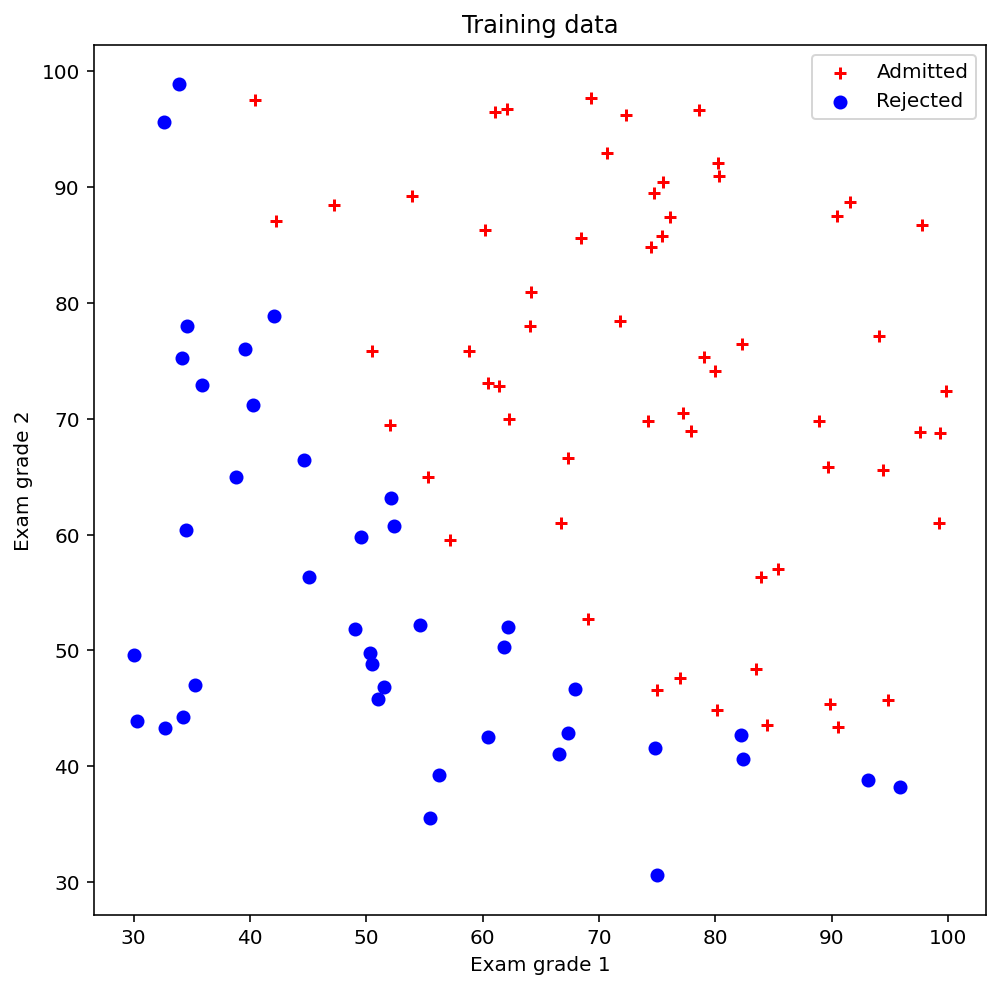

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(x=x1[idx_admit],y=x2[idx_admit],c="red",marker="+") 
plt.scatter(x1[idx_rejec],x2[idx_rejec],c="blue",marker="o" ) 
plt.title('Training data')
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(["Admitted","Rejected"])
plt.show()

## 2. Plot the sigmoid function (1pt)

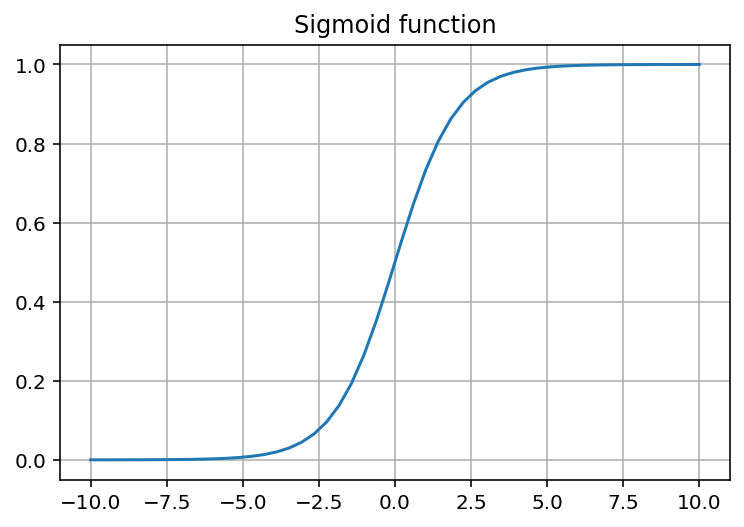

In [20]:
plt.figure(2)
plt.plot(x_values,sigmoid(x_values))
plt.title("Sigmoid function")
plt.grid(True)

## 3. Plot the loss curve in the course of gradient descent using the mean square error (2pt)

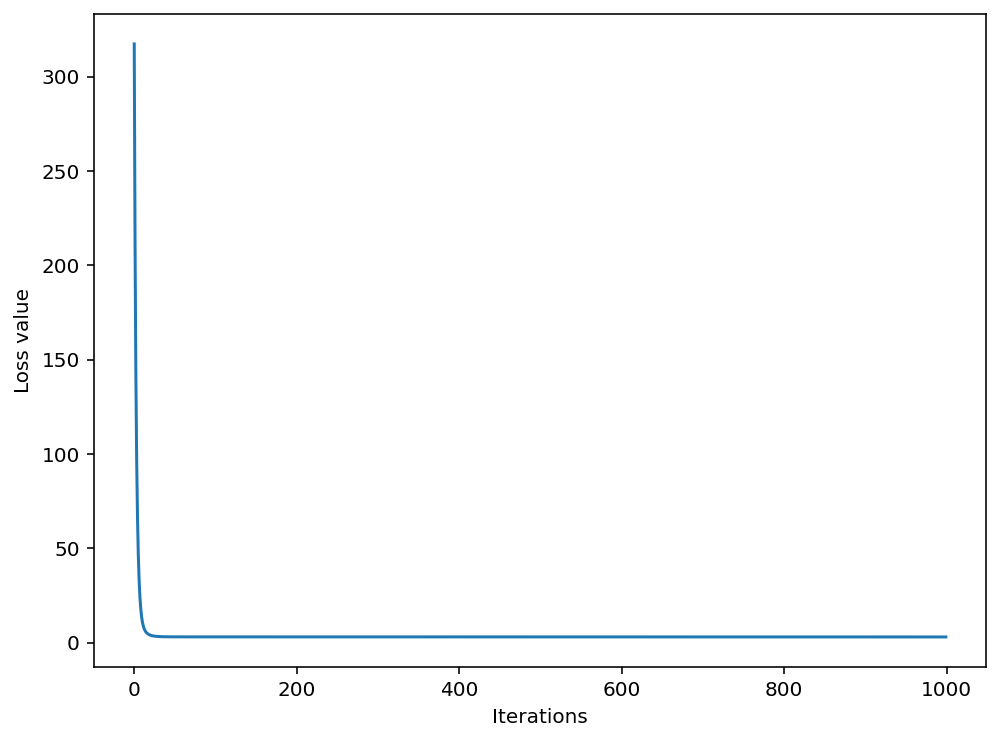

In [256]:
plt.figure(figsize=(8,6))
plt.plot(L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 4. Plot the loss curve in the course of gradient descent using the cross-entropy error (2pt)

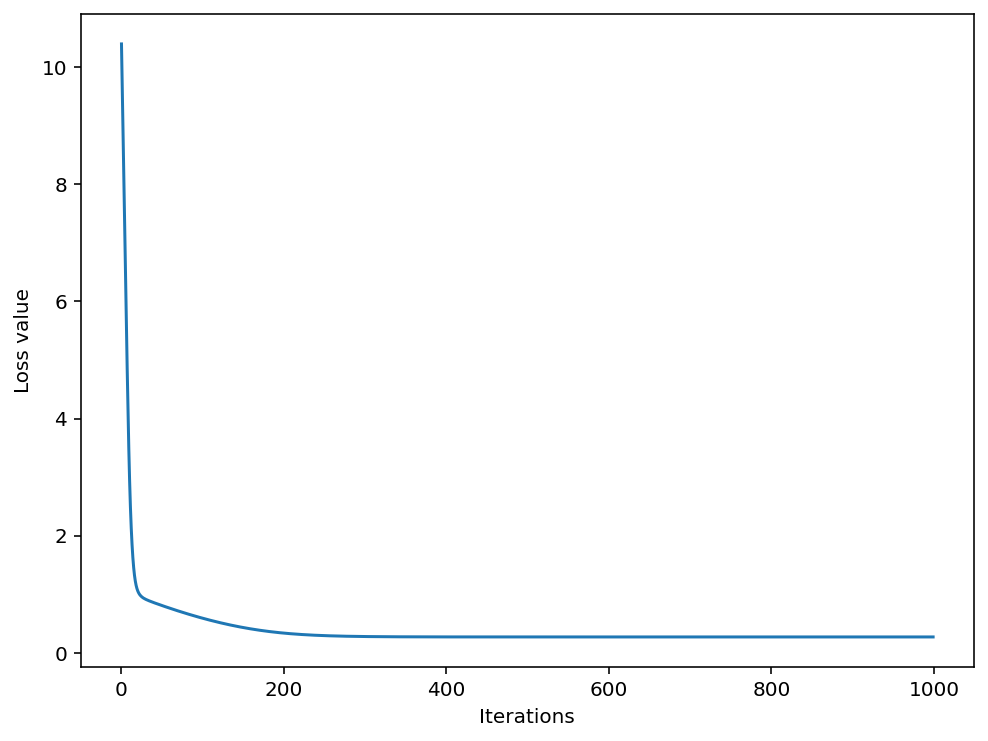

In [174]:
# plot
plt.figure(figsize=(8,6))
plt.plot(L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 5. Plot the decision boundary using the mean square error (2pt)

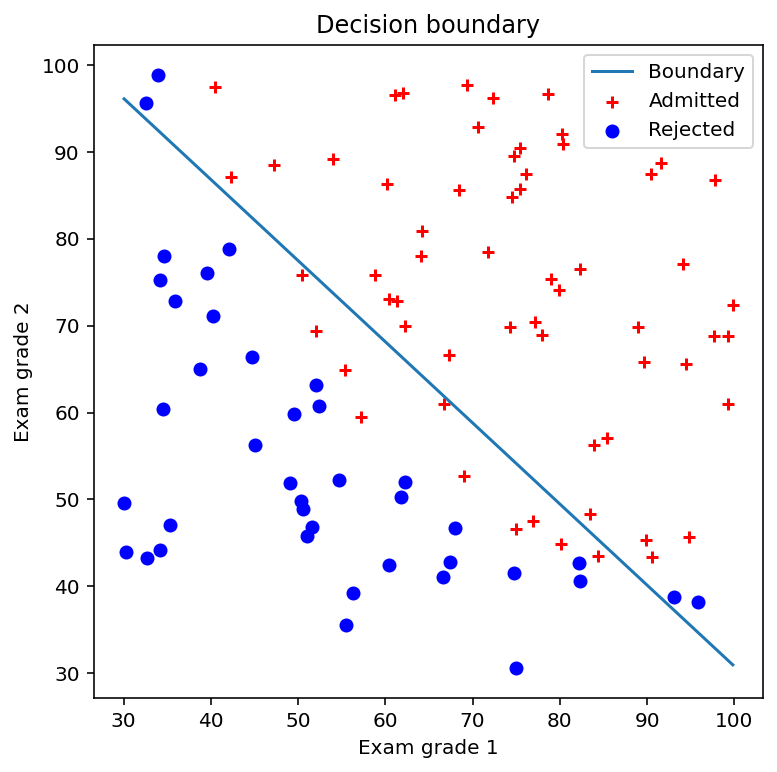

In [258]:
plt.figure(4,figsize=(6,6))
plt.scatter(x=x1[idx_admit],y=x2[idx_admit],c="red",marker="+") 
plt.scatter(x1[idx_rejec],x2[idx_rejec],c="blue",marker="o" ) 
plt.plot(x_line,y_line)
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(["Boundary","Admitted","Rejected"])
plt.title('Decision boundary')
plt.show()

## 6. Plot the decision boundary using the cross-entropy error (2pt)

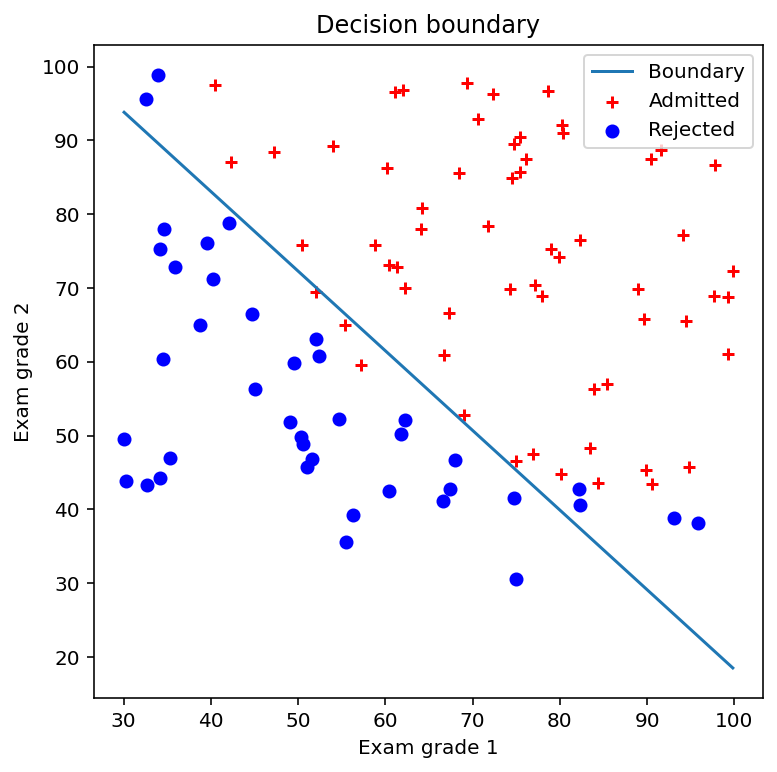

In [198]:
plt.figure(4,figsize=(6,6))
plt.scatter(x=x1[idx_admit],y=x2[idx_admit],c="red",marker="+") 
plt.scatter(x1[idx_rejec],x2[idx_rejec],c="blue",marker="o" ) 
plt.plot(x_line,y_line)
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(["Boundary","Admitted","Rejected"])
plt.title('Decision boundary')
plt.show()

## 7. Plot the decision boundary using the Scikit-learn logistic regression algorithm (2pt)

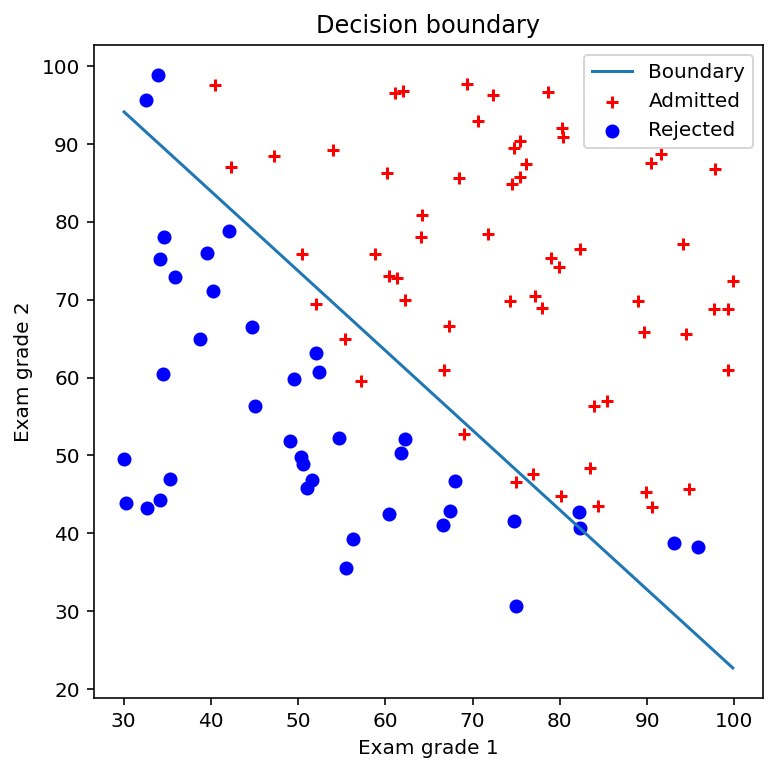

In [57]:
plt.figure(4,figsize=(6,6))
plt.scatter(x=x1[idx_admit],y=x2[idx_admit],c="red",marker="+") 
plt.scatter(x1[idx_rejec],x2[idx_rejec],c="blue",marker="o" )

plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')

x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
x_line=np.linspace(x1_min, x1_max)
y_line=-(b[0]+w_sklearn[0][0]*x_line)/w_sklearn[0][1]


plt.plot(x_line,y_line)

plt.title('Decision boundary (black with gradient descent and magenta with scikit-learn)')
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(["Boundary","Admitted","Rejected"])
plt.title('Decision boundary')
plt.show()

## 8. Plot the probability map using the mean square error (2pt)

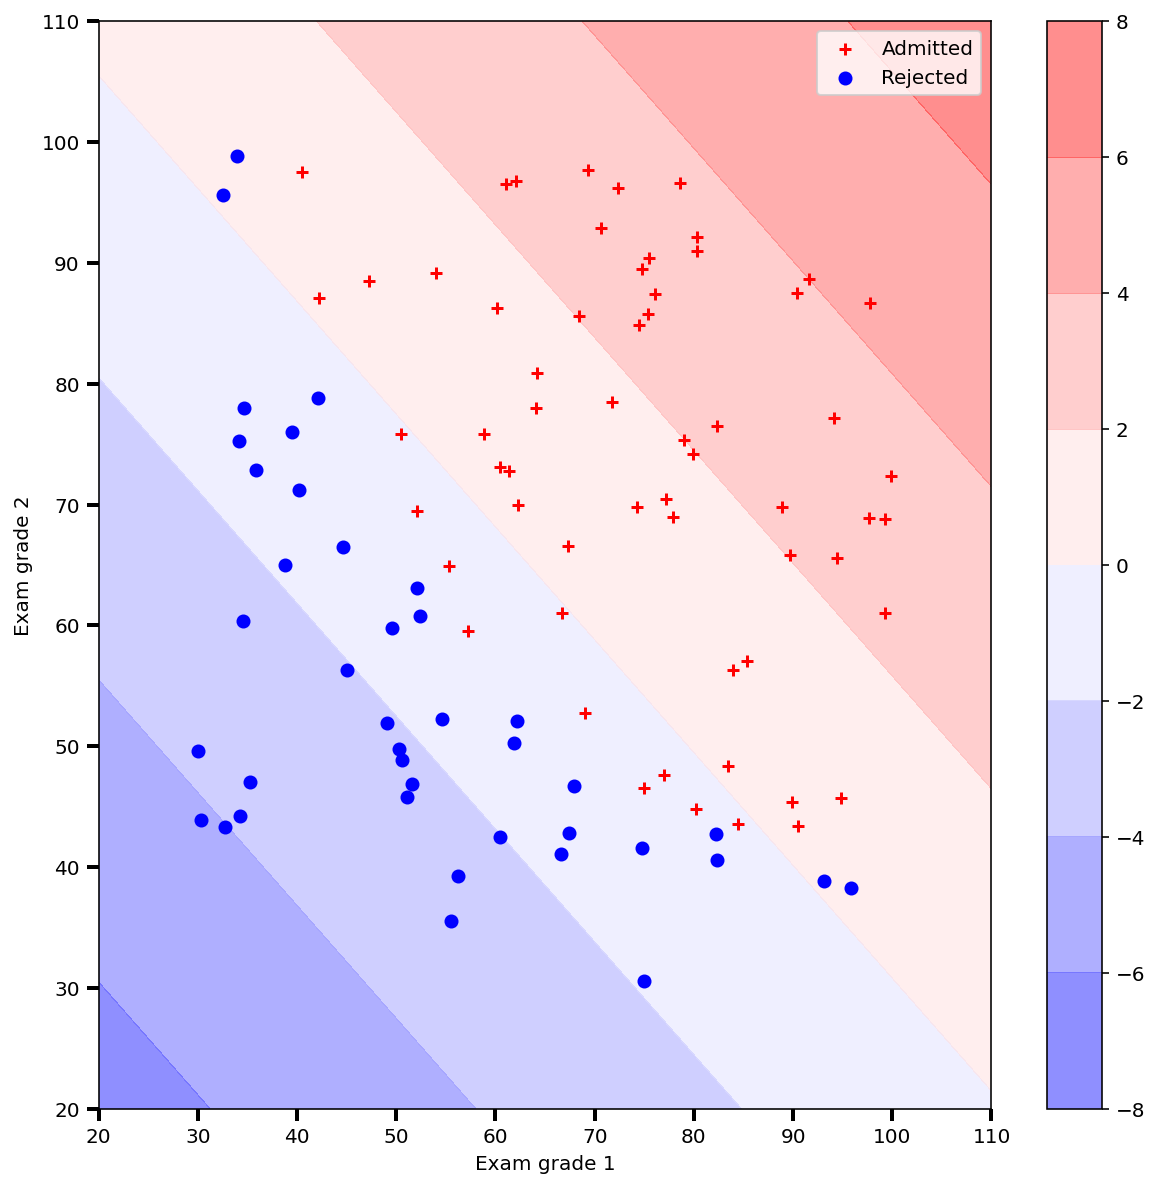

In [42]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.tick_params(length=6, width=2, grid_alpha=0.5)
ax.set_xlabel('Exam grade 1')
ax.set_ylabel('Exam grade 2')

ax.set_xlim(20, 110)
ax.set_ylim(20, 110)

cf = ax.contourf(score_x1,score_x2,Z,cmap="bwr",alpha=0.5)
ax.scatter(x=x1[idx_admit],y=x2[idx_admit],c="red",marker="+",label="Admitted") 
ax.scatter(x1[idx_rejec],x2[idx_rejec],c="blue",marker="o",label="Rejected" ) 
cbar = fig.colorbar(cf)
cbar.update_ticks()
plt.legend()
plt.show()

## 9. Plot the probability map using the cross-entropy error (2pt)

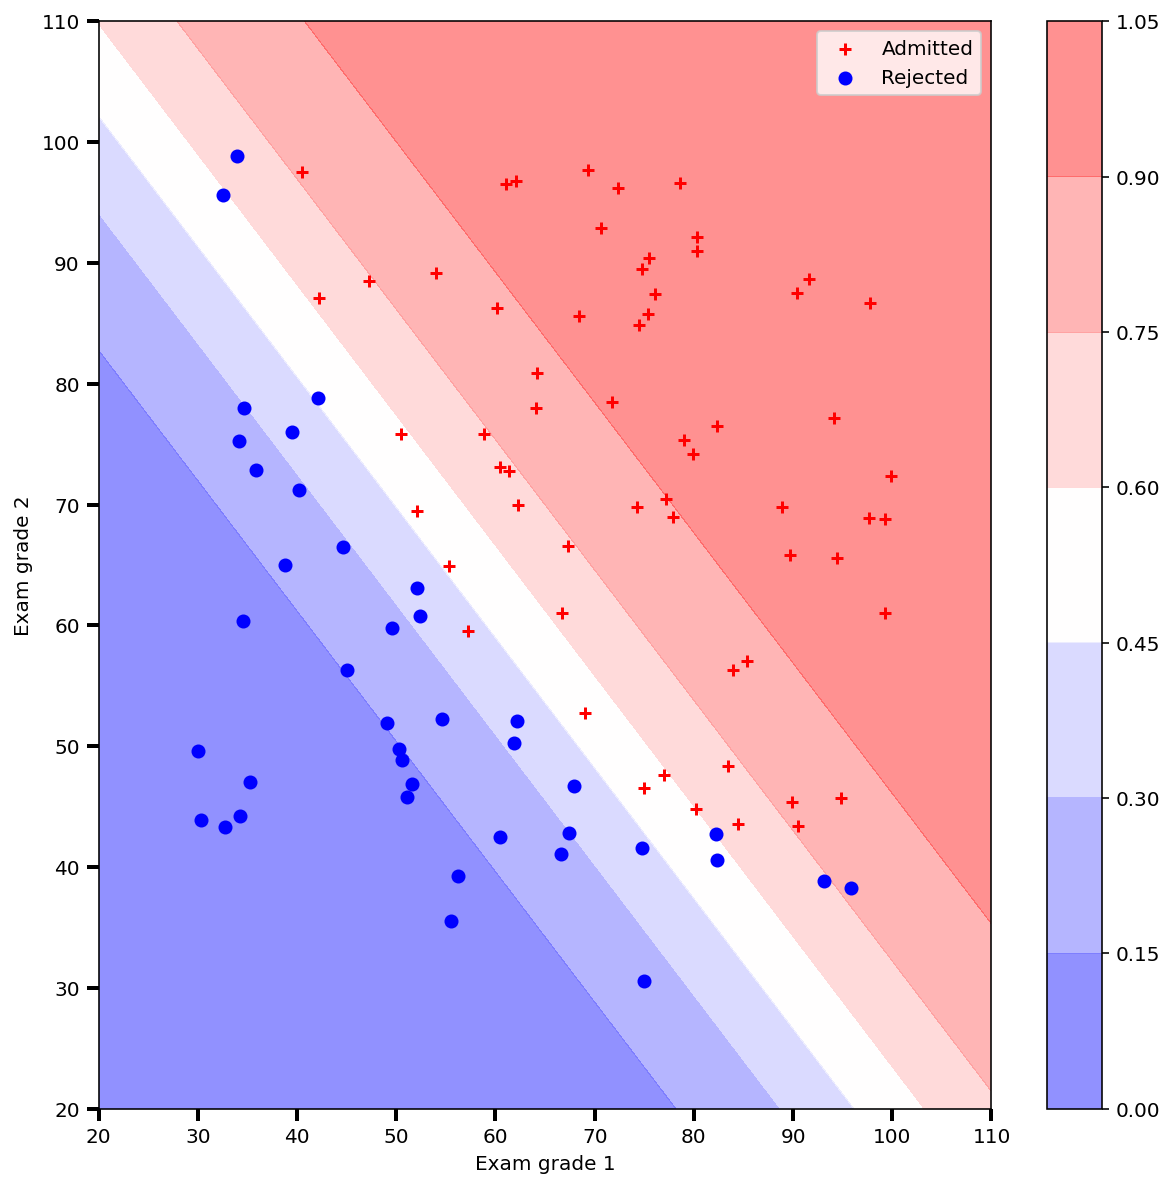

In [249]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.tick_params(length=6, width=2, grid_alpha=0.5)
ax.set_xlabel('Exam grade 1')
ax.set_ylabel('Exam grade 2')

ax.set_xlim(20, 110)
ax.set_ylim(20, 110)

cf = ax.contourf(score_x1,score_x2,Z,cmap="bwr",alpha=0.5)
ax.scatter(x=x1[idx_admit],y=x2[idx_admit],c="red",marker="+",label="Admitted") 
ax.scatter(x1[idx_rejec],x2[idx_rejec],c="blue",marker="o",label="Rejected" ) 
cbar = fig.colorbar(cf)
cbar.update_ticks()
plt.legend()
plt.show()